<a href="https://colab.research.google.com/github/ritiknayakzz/ML-with-Sklearn/blob/main/polynomial_vs_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polynomial vs Linear**

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (15, 8)

from sklearn.metrics import mean_squared_error

In [ ]:
## dataset with curvilinear relationship

x = 10 * np.random.normal(0, 1, 70)
y = 10 * (-x ** 2) + np.random.normal(-100, 100, 70)

Text(0, 0.5, 'Target')

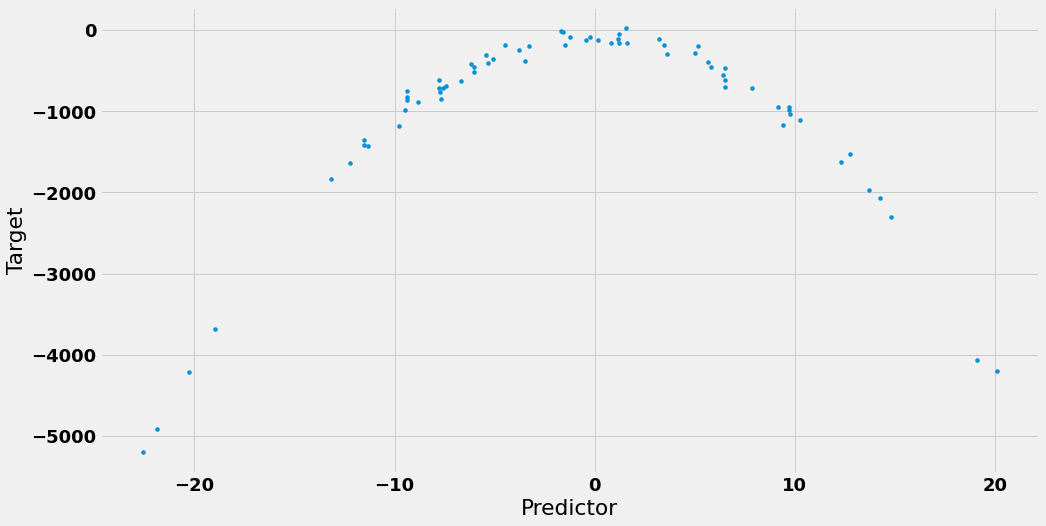

In [ ]:
plt.scatter(x, y, s=15)
plt.xlabel('Predictor')
plt.ylabel('Target')

RMSE of Linear Regression:  1158.752933934841


Text(0, 0.5, 'Target')

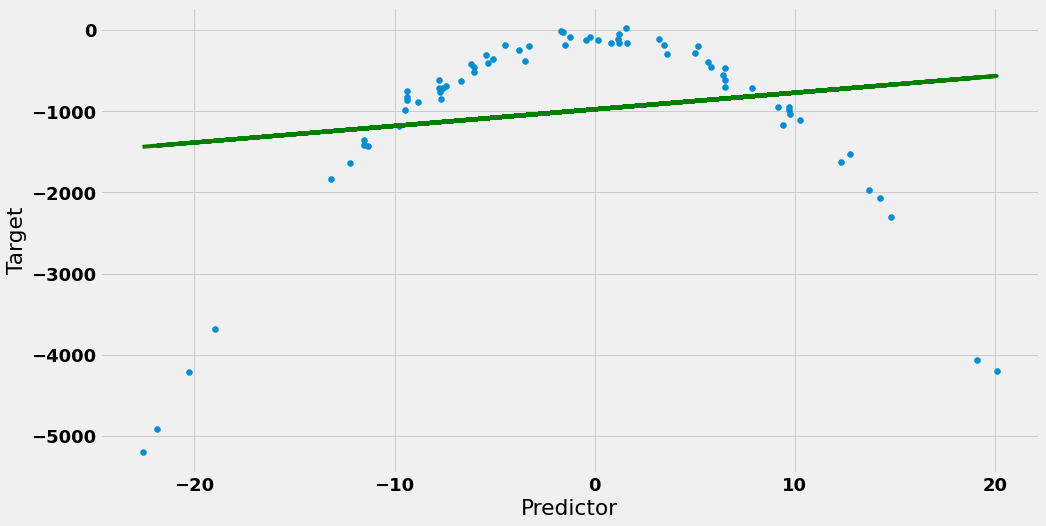

In [ ]:
## importing linear regression

from sklearn.linear_model import LinearRegression

## training model

lm = LinearRegression()
lm.fit(x.reshape(-1, 1), y.reshape(-1, 1))

y_pred = lm.predict(x.reshape(-1, 1))

print('RMSE of Linear Regression: ', math.sqrt(mean_squared_error(y, y_pred)))

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Predictor')
plt.ylabel('Target')

RMSE of Linear Regression:  1158.752933934841
RMSE of Polynomial Regression:  88.39574324407408


Text(0, 0.5, 'Target')

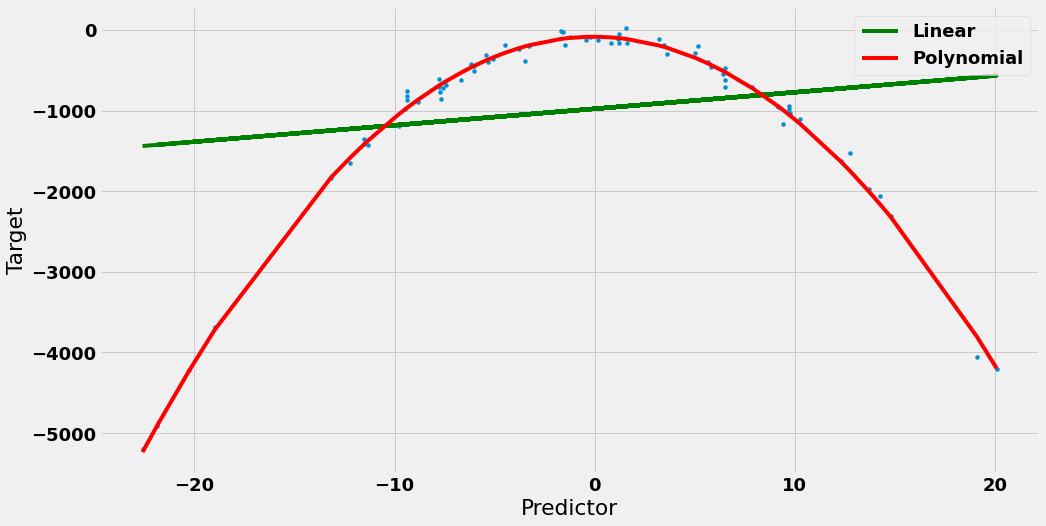

In [ ]:
## importing libraries for polynomial transformation

from sklearn.preprocessing import PolynomialFeatures

## creating pipeline

from sklearn.pipeline import Pipeline

Input = [('polynomial', PolynomialFeatures(degree = 2)), ('modal', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x.reshape(-1, 1), y.reshape(-1, 1))

poly_pred = pipe.predict(x.reshape(-1, 1))

## sorting predicted values with respect to predictor

print('RMSE of Linear Regression: ', math.sqrt(mean_squared_error(y, y_pred)))
print('RMSE of Polynomial Regression: ', math.sqrt(mean_squared_error(y, poly_pred)))

sorted_zip = sorted(zip(x, poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

plt.scatter(x, y, s=15)
plt.plot(x, y_pred, color = 'green', label = 'Linear')
plt.plot(x_poly, poly_pred, color = 'red', label = 'Polynomial')
plt.legend()
plt.xlabel('Predictor')
plt.ylabel('Target')

Ho! the RMSE for Polynomial regression is significantly lesser than that of the Linear regression

**Why zipping?**

In [3]:
t1 = np.random.randn(10)
t2 = np.random.randn(10)

In [6]:
z = zip(t1, t2)
z = sorted(z)

for i, j in z:
  print(i, j)

-1.449281590076819 -0.08974929871107458
-0.7293038042280682 0.8945761595279087
-0.5245019158864336 0.3880923079226579
0.04315692541957311 2.014781082700278
0.5502532315271831 -0.663835720548139
0.6121961664380374 1.4287344977555765
0.8493601597982487 -0.021123517016556095
0.9065119675528351 0.8404896893080842
1.3302037133021691 -0.14237993068530444
1.8452386348777294 0.3134850288879202


In [ ]:
z

[(-1.998214753053167, 0.993859739145723),
 (-0.8246528073060121, 1.4130951589138236),
 (-0.7039577193202788, -1.405529517205235),
 (-0.42810652595759313, -0.16862671474858199),
 (-0.2505652928219249, -0.1654035698943227),
 (0.0004924210598860884, 1.1418258898487499),
 (0.18119692278616864, 0.16667378462899476),
 (0.27308152615684816, -1.2258615277320148),
 (0.3623439961437193, -0.900209782283538),
 (0.5467431549829133, 0.11993637874681377)]